In [ ]:
import csv
import string
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# this will be the directory of our training set and validation set

TRAINING_FILE = '/content/drive/MyDrive/MNIST_Data/sign_mnist_train/sign_mnist_train.csv'
VALIDATION_FILE = '/content/drive/MyDrive/MNIST_Data/sign_mnist_test/sign_mnist_test.csv'

Note:

Unlike other dataset these dataset we will not have the actual images provided, instead we will have the data serialized as csv files.

Take a look at how the data looks like within the csv file:

In [ ]:
# loading the training file which is in csv format and printing the lines

with open(TRAINING_FILE) as training_file:
    line = training_file.readline()
    print(f"First line (header) looks like this:\n{line}")
    line = training_file.readline()
    print(f"Each subsequent line (data points) look like this:\n{line}")

First line (header) looks like this:
label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pix

As we can see, each file includes a header (the first line) and each subsequent data point is represented as a line that contains 785 values.

The first value is the label (the numeric representation of each letter) and the other 784 values are the value of each pixel of the image. Remember that the original images have a resolution of 28x28, which sums up to 784 pixels.(Taken from Kaggle description of DataSet)

##**Parsing the dataset**

We will create a function that should be able to read a file passed as input and return 2 numpy arrays, one containing the labels and one containing the 28x28 representation of each image within the file. These numpy arrays should have type float64.

A couple of things to keep in mind:

The first line contains the column headers, so you should ignore it.

Each successive line contains 785 comma-separated values between 0 and 255

The first value is the label

The rest are the pixel values for that picture

Tips:

csv.reader returns an iterable that returns a row of the csv file in each iteration. Following this convention, row[0] has the label and row[1:] has the 784 pixel values.

To reshape the arrays (going from 784 to 28x28), you can use functions such as np.array_split or np.reshape.

For type conversion of the numpy arrays, use the method np.ndarray.astype.

In [ ]:
def parse_data_from_input(filename):
    with open(filename) as file:
        reader = csv.reader(file, delimiter=',')    
        imgs = []
        labels = []
        next(reader, None)
        for row in reader:
            label = row[0]
            data = row[1:]
            img = np.array(data).reshape((28, 28))

            imgs.append(img)
            labels.append(label)

    images = np.array(imgs).astype(float)
    labels = np.array(labels).astype(float)
    return images, labels

##**Test our function**


1.   Here we check that the we have properly loaded the training images as well as validation images.
2.   We can also see the dimension of the our training images dataset as well as validation images.



In [ ]:
training_images, training_labels = parse_data_from_input(TRAINING_FILE)
validation_images, validation_labels = parse_data_from_input(VALIDATION_FILE)

print(f"Training images has shape: {training_images.shape}")
print(f"Training labels has shape: {training_labels.shape}")
print(f"Validation images has shape: {validation_images.shape}")
print(f"Validation labels has shape: {validation_labels.shape}")

Training images has shape: (27455, 28, 28)
Training labels has shape: (27455,)
Validation images has shape: (7172, 28, 28)
Validation labels has shape: (7172,)


##**Visualizing the Training dataset**
Now that we have converted the initial csv data into a format that is compatible with computer vision tasks, now we will take a moment to actually see how the images of the dataset look like:

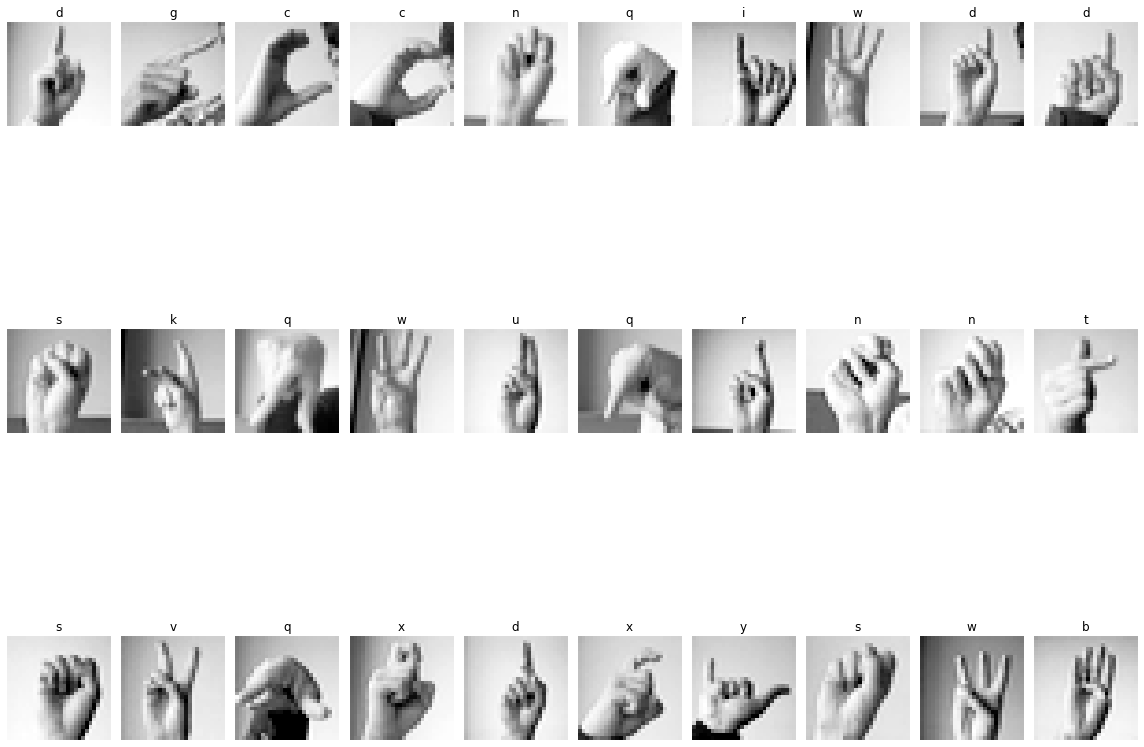

In [ ]:
# Plot a sample of 30 images from the training set
def plot_categories(training_images, training_labels):
    fig, axes = plt.subplots(3, 10, figsize=(16, 15))
    axes = axes.flatten()
    letters = list(string.ascii_lowercase)

    for k in range(30):
        img = training_images[k]
        img = np.expand_dims(img, axis=-1)
        img = array_to_img(img)
        ax = axes[k]
        ax.imshow(img, cmap="Greys_r")
        ax.set_title(f"{letters[int(training_labels[k])]}")
        ax.set_axis_off()

    plt.tight_layout()
    plt.show()

plot_categories(training_images, training_labels)

In [ ]:
train_df = pd.read_csv(TRAINING_FILE)
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [ ]:
train_df.columns

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

In [ ]:
train_df.label.value_counts()

17    1294
16    1279
11    1241
22    1225
5     1204
18    1199
3     1196
14    1196
19    1186
23    1164
8     1162
20    1161
13    1151
2     1144
0     1126
24    1118
10    1114
6     1090
15    1088
21    1082
12    1055
7     1013
1     1010
4      957
Name: label, dtype: int64

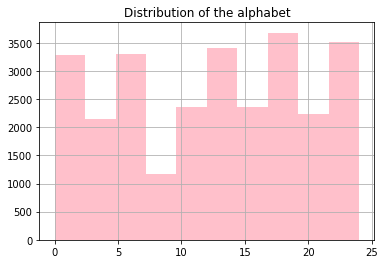

In [ ]:
train_df.label.hist(color='pink',bins=10)
plt.title("Distribution of the alphabet")
plt.show()

Lets dive more deep and look at the distribution more minutely

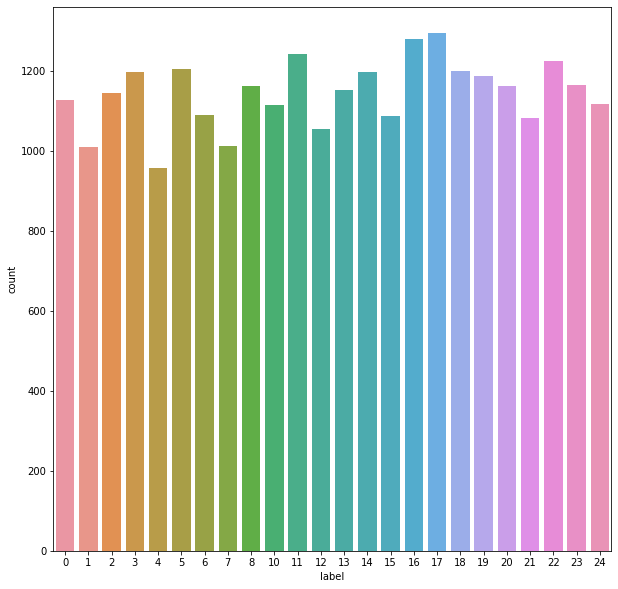

In [ ]:
import seaborn as sns
plt.figure(figsize = (10,10)) 
sns.countplot(x=train_df['label'])
plt.show()



1.   The distribution of the alphabet through out the dataset is quite good 
2.   lets look at the individual count of the alphabet of the whole dataset

 



In [ ]:
import plotly.express as px
fig = px.pie(train_df, values=train_df.label, names=train_df.label, title='Count of alphabets')
fig.show()

##Creating the generators for the CNN
Now that we have successfully organized the data in a way that can be easily fed to Keras' ImageDataGenerator, it is time to code the generators that will yield batches of images, both for training and validation.

Some important notes:


1.   The images in this dataset come in the same resolution so you don't need to set a custom target_size in this case. In fact, we can't even do so because this time we will not be using the flow_from_directory method (as in previous assignments). Instead you will use the flow method.
2.  You need to add the "color" dimension to the numpy arrays that encode the images. These are black and white images, so this new dimension should have a size of 1 (instead of 3, which is used when dealing with colored images). Take a look at the function np.expand_dims for this.



In [ ]:
# In this section we will have to add another dimension to the data
# So, for example, if our array is (10000, 28, 28)
# We will need to make it (10000, 28, 28, 1)
# We can use np.expand_dims

def train_val_generators(training_images, training_labels, validation_images, validation_labels):
    training_images = np.expand_dims(training_images, axis=3)
    validation_images = np.expand_dims(validation_images, axis=3)

  # Instantiate the ImageDataGenerator class and also we need to normalize pixel values and set arguments to augment the images (if desired)
    train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


  
    train_generator = train_datagen.flow(x=training_images,
                                       y=training_labels,
                                       batch_size=32) 

  

    validation_datagen = ImageDataGenerator(
    rescale=1 / 255)

 
    validation_generator = validation_datagen.flow(x=validation_images,
                                                 y=validation_labels,
                                                 batch_size=32) 


    return train_generator, validation_generator

Testing to see our generator

In [ ]:
# Test our generators
train_generator, validation_generator = train_val_generators(training_images, training_labels, validation_images, validation_labels)

print(f"Images of training generator have shape: {train_generator.x.shape}")
print(f"Labels of training generator have shape: {train_generator.y.shape}")
print(f"Images of validation generator have shape: {validation_generator.x.shape}")
print(f"Labels of validation generator have shape: {validation_generator.y.shape}")

Images of training generator have shape: (27455, 28, 28, 1)
Labels of training generator have shape: (27455,)
Images of validation generator have shape: (7172, 28, 28, 1)
Labels of validation generator have shape: (7172,)


##Coding the CNN¶
One last step before training is to define the architecture of the model that will be trained.

Complete the create_model function below. This function should return a Keras' model that uses the Sequential or the Functional API.

The last layer of our model should have a number of units that corresponds to the number of possible categories, as well as the correct activation function.

Aside from defining the architecture of the model, we should also compile it so make sure to use a loss function that is suitable for multi-class classification.

**Note that we should use no more than 2 Conv2D and 2 MaxPooling2D layers to achieve the desired performance.**

In [ ]:
def create_model():
    model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')])
  

    model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
   
  
    return model

In [ ]:
# Save our model for later use
model = create_model()

In [ ]:
# Train our model
history = model.fit(train_generator,
                    epochs=50,
                    validation_data=validation_generator)

Epoch 1/50
858/858 [==============================] - 29s 19ms/step - loss: 2.5639 - accuracy: 0.2168 - val_loss: 1.5940 - val_accuracy: 0.4968
Epoch 2/50
858/858 [==============================] - 17s 19ms/step - loss: 1.7808 - accuracy: 0.4284 - val_loss: 0.9973 - val_accuracy: 0.6675
Epoch 3/50
858/858 [==============================] - 16s 19ms/step - loss: 1.3704 - accuracy: 0.5523 - val_loss: 0.7919 - val_accuracy: 0.7186
Epoch 4/50
858/858 [==============================] - 17s 19ms/step - loss: 1.1295 - accuracy: 0.6280 - val_loss: 0.5848 - val_accuracy: 0.7980
Epoch 5/50
858/858 [==============================] - 16s 19ms/step - loss: 0.9476 - accuracy: 0.6847 - val_loss: 0.5452 - val_accuracy: 0.8049
Epoch 6/50
858/858 [==============================] - 17s 20ms/step - loss: 0.8326 - accuracy: 0.7264 - val_loss: 0.4401 - val_accuracy: 0.8408
Epoch 7/50
858/858 [==============================] - 17s 19ms/step - loss: 0.7483 - accuracy: 0.7537 - val_loss: 0.3504 - val_accuracy:

##Now take a look at our training history

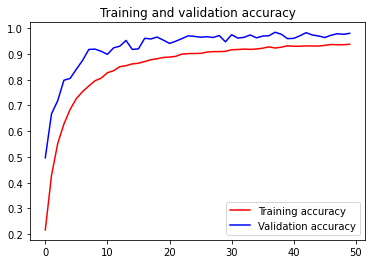

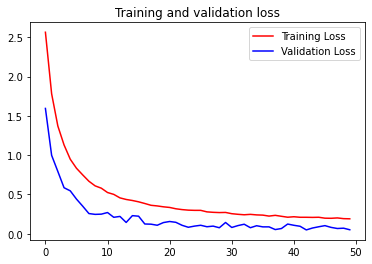

In [ ]:
# Plot the chart for accuracy and loss on both training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

The model is good as it is not overfitting

A reasonable benchmark is to achieve over 90% accuracy for training and over 95% accuracy for validation within 30 epochs

##Save Archiectue and Weights

In [ ]:
#to save the weights in the model as a HDF file
_
model.save_weights('MNIST_Guesture_Recognition.h5')

In [ ]:
#to save the architecture of the model as a json file

with open('Model_Architecture_MNIST_Guesture_Recognition.json','w') as f:
    f.write(model.to_json())